In [1]:
import pandas as pd
import anndata as ad
import tarfile
import scanpy as sc
from scipy.io import mmread
import numpy as np
from scipy.stats import median_abs_deviation
import matplotlib.pyplot as plt

# Preprocessing of sample C3L-00004-T1_CPT0001540013

## Read the files (skip after first time)

Save the data from the website: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM7710073
Load the following code.
Change the file path when necessary

In [2]:
#edit based on your file path

file_path1 = "C:/Users/gajaj/Downloads/GSM7710073_C3L-00004-T1_CPT0001540013_snRNA_ccRCC.tar.gz"
output_dir1 = 'C:/Users/gajaj/OneDrive/Documents/TUM/computational_single_cell/preprocessing_project/Sample1'

In [6]:
with tarfile.open(file_path1, "r") as tar:
    tar.extractall(path=output_dir1)
    print("Files extracted successfully")

Files extracted successfully


In [7]:
with tarfile.open(file_path2, "r") as tar:
    tar.extractall(path=output_dir2)
    print("Files extracted successfully")

Files extracted successfully


In [14]:
#edit your file paths
input_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv.gz"
input_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv.gz"
input_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx.gz"

In [15]:
#edit your file paths
output_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx"


In [10]:
import gzip

with gzip.open(input_file_barcodes1, "rt") as gz_file:  
    with open(output_file_barcodes1, "w") as out_file:
        out_file.write(gz_file.read())

In [11]:
with gzip.open(input_file_features1, "rt") as gz_file:  
    with open(output_file_features1, "w") as out_file:
        out_file.write(gz_file.read())

In [16]:
with gzip.open(input_file_matrix1, "rt") as gz_file:  
    with open(output_file_matrix1, "w") as out_file:
        out_file.write(gz_file.read())

In [17]:
with gzip.open(input_file_barcodes2, "rt") as gz_file:  
    with open(output_file_barcodes2, "w") as out_file:
        out_file.write(gz_file.read())

In [18]:
with gzip.open(input_file_features2, "rt") as gz_file:  
    with open(output_file_features2, "w") as out_file:
        out_file.write(gz_file.read())

In [19]:
with gzip.open(input_file_matrix2, "rt") as gz_file:  
    with open(output_file_matrix2, "w") as out_file:
        out_file.write(gz_file.read())

## Create an Anndata object for Sample 1

In [2]:
#edit your file paths
output_file_barcodes1 = "Sample1/barcodes.tsv"
output_file_features1 = "Sample1/features.tsv"
output_file_matrix1 = "Sample1/matrix.mtx"

In [3]:
barcodes1 = pd.read_csv(output_file_barcodes1, sep='\t', index_col=None, header=None)[0].values
barcodes1

array(['AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACGAA-1',
       ..., 'TTTGTTGTCTTTGCGC-1', 'TTTGTTGTCTTTGCTA-1',
       'TTTGTTGTCTTTGGCT-1'], dtype=object)

In [4]:
features1 = pd.read_csv(output_file_features1, sep='\t', index_col=None, header=None)[1].values
features1

array(['MIR1302-2HG', 'FAM138A', 'OR4F5', ..., 'AC007325.1', 'AC007325.4',
       'AC007325.2'], dtype=object)

In [5]:
gene_ids1 = pd.read_csv(output_file_features1, sep='\t', index_col=None, header=None)[0].values
gene_ids1

array(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092', ...,
       'ENSG00000276017', 'ENSG00000278817', 'ENSG00000277196'],
      dtype=object)

In [6]:
X1 = mmread(output_file_matrix1).tocsc()  # Convert to compressed sparse column format

In [7]:
adata1 = sc.AnnData(X1.T)  # Transpose matrix (cells x genes)
adata1.obs_names = barcodes1  # Assign cell barcodes as obs_names
adata1.var_names = features1  # Assign gene names as var_names

adata1.var["gene_ids"] = gene_ids1

## Preprocessing Sample 1

In [8]:
adata1.var_names_make_unique()

### Quality control

In [9]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata1.var["mt"] = adata1.var_names.str.startswith("MT-")
# ribosomal genes
adata1.var["ribo"] = adata1.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata1.var["hb"] = adata1.var_names.str.contains("^HB[^(P)]")

adata1.var

,gene_ids,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,False,False,False
FAM138A,ENSG00000237613,False,False,False
OR4F5,ENSG00000186092,False,False,False
AL627309.1,ENSG00000238009,False,False,False
AL627309.3,ENSG00000239945,False,False,False
...,...,...,...,...
AC141272.1,ENSG00000277836,False,False,False
AC023491.2,ENSG00000278633,False,False,False
AC007325.1,ENSG00000276017,False,False,False
AC007325.4,ENSG00000278817,False,False,False


In [10]:
sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True, percent_top=[20]
)

### Filtering low quality cells

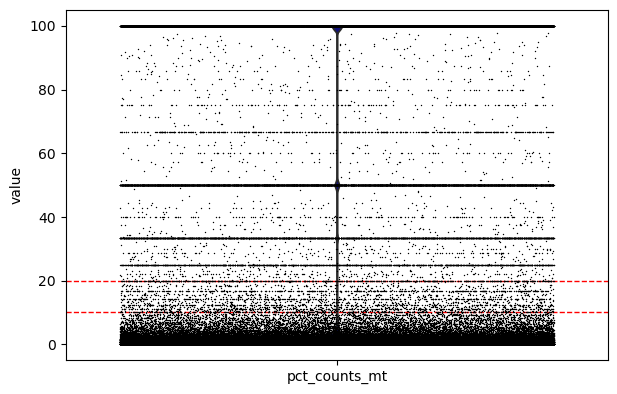

In [11]:
# Plot the violin plot
ax = sc.pl.violin(adata1, "pct_counts_mt", jitter=0.4, log=False, color='darkblue', show=False)

# Add horizontal lines for thresholds
thresholds = [10, 20]  # Replace with your desired percentages
for threshold in thresholds:
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.show()

In [19]:
print(adata1.shape)

(1127217, 36601)


In [12]:
adata1 = adata1[adata1.obs['pct_counts_mt'] < 10, :]


(786758, 36601)


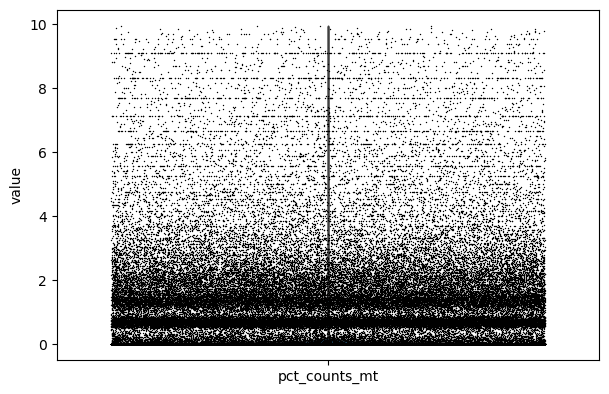

In [14]:
print(adata1.shape)  # Check the number of cells and genes
sc.pl.violin(adata1, ['pct_counts_mt'], jitter=0.4, log=False)


### Filter Cells Based on Total Genes

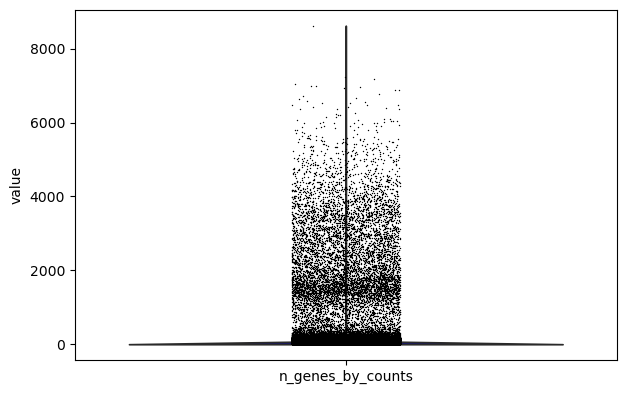

In [23]:
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

In [13]:
adata1 = adata1[(adata1.obs['n_genes_by_counts'] >= 200) & (adata1.obs['n_genes_by_counts'] <= 10000)]

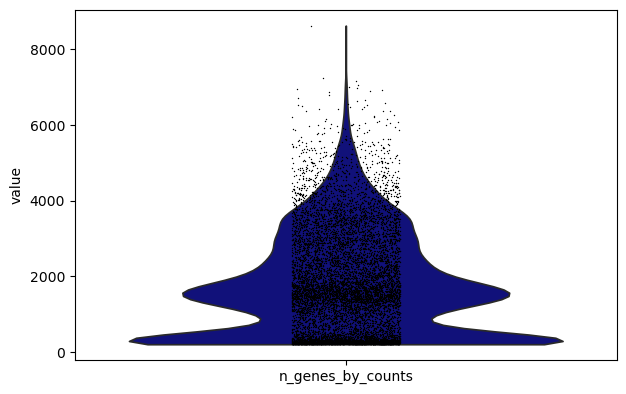

In [16]:
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

In [17]:
print(adata1.shape)

(10282, 36601)


### Filter Cells Based on Total Count

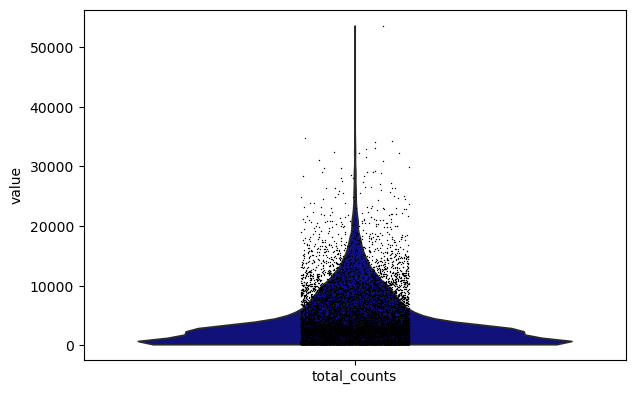

In [18]:
sc.pl.violin(adata1, "total_counts", color='darkblue')

In [14]:
adata1 = adata1[(adata1.obs['total_counts'] >= 1000) &  # Minimum UMIs
    (adata1.obs['total_counts'] <= 80000)]   # Maximum UMIs

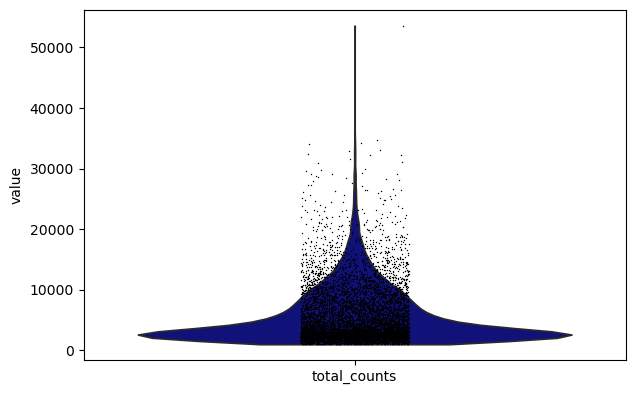

In [20]:
sc.pl.violin(adata1, "total_counts", color='darkblue')

In [21]:
print(adata1.shape)

(7323, 36601)


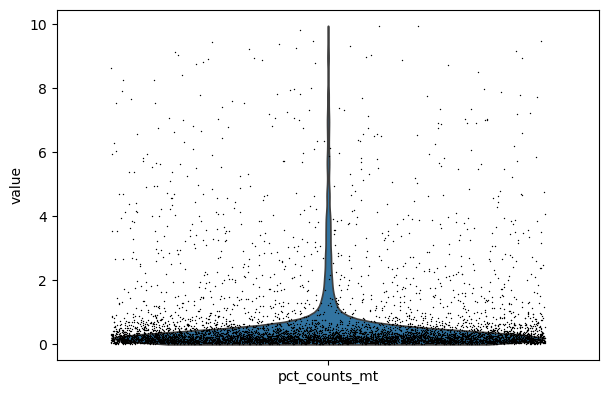

In [22]:
sc.pl.violin(adata1, ['pct_counts_mt'], jitter=0.4, log=False)

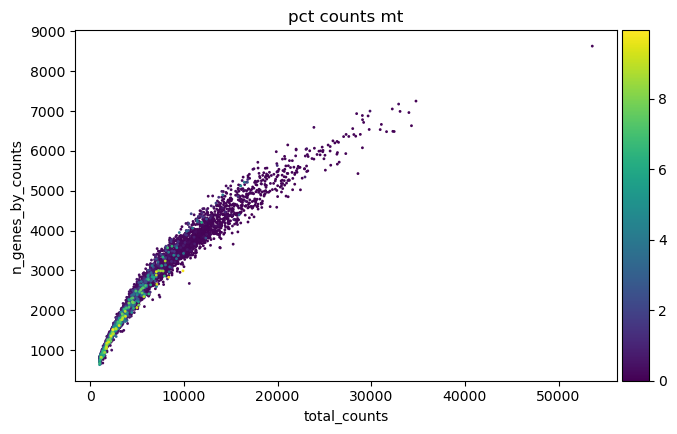

In [23]:
sc.pl.scatter(adata1, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [15]:
print(adata1.shape)

(7323, 36601)


## (SKIP THIS PART!) Filtering the outliers in a data-driven way

Define a function to find outliers in a data-driven way:

In [74]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [75]:
adata1.obs["outlier"] = (
    is_outlier(adata1, "log1p_total_counts", 6)
    | is_outlier(adata1, "log1p_n_genes_by_counts", 6)
    | is_outlier(adata1, "pct_counts_in_top_20_genes", 6)
)
adata1.obs.outlier.value_counts()

outlier
False    10348
True        46
Name: count, dtype: int64

In [76]:
adata1.obs["mt_outlier"] = is_outlier(adata1, "pct_counts_mt", 3) | (
    adata1.obs["pct_counts_mt"] > 8
)
adata1.obs.mt_outlier.value_counts()

mt_outlier
False    7847
True     2547
Name: count, dtype: int64

In [77]:
adata1.obs["mt_outlier"]

AAACCCAAGGCCTAGA-1     True
AAACCCAAGTACTCGT-1    False
AAACCCAAGTGCCTCG-1    False
AAACCCAAGTTCCGGC-1    False
AAACCCACAAGGAGTC-1    False
                      ...  
TTTGTTGGTCCTTTGC-1    False
TTTGTTGTCATTACGG-1     True
TTTGTTGTCCACATAG-1     True
TTTGTTGTCCGACAGC-1     True
TTTGTTGTCTCGTCGT-1    False
Name: mt_outlier, Length: 10394, dtype: bool

## Annotation

In [30]:
metadata = pd.read_csv("Sample1/GSE240822_GBM_ccRCC_RNA_metadata_CPTAC_samples.tsv", sep="\t")
metadata.head()

,Merged_barcode,Barcode,Sample_RNA,Sample_ATAC,Case_ID,Piece_ID,Sample_type,data.type.rna,Chemistry,Cancer,cell_type.harmonized.cancer,Aliquot,GEO.sample
0,ccRCC_C3L-00088-T1_AAACCCAAGACGACTG-1,AAACCCAAGACGACTG-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,Tumor,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC
1,ccRCC_C3L-00088-T1_AAACCCACAAATGATG-1,AAACCCACAAATGATG-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,T-cells,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC
2,ccRCC_C3L-00088-T1_AAACCCACAATCCAGT-1,AAACCCACAATCCAGT-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,Tumor,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC
3,ccRCC_C3L-00088-T1_AAACCCACACAATCTG-1,AAACCCACACAATCTG-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,Tumor,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC
4,ccRCC_C3L-00088-T1_AAACCCACACTCCTTG-1,AAACCCACACTCCTTG-1,CPT0000870003-CPT0000870003-lib1,CPT0000870003,C3L-00088,C3L-00088-T1,Tumor,snRNA,snATAC,ccRCC,Tumor,CPT0000870003,C3L-00088-T1_CPT0000870003_snRNA_ccRCC


In [31]:
#Filter only the rows relevant to sample 1.
sample1_code = 'C3L-00004-T1_CPT0001540013_snRNA_ccRCC'

metadata_sample1 = metadata[metadata['GEO.sample'] == sample1_code]

In [32]:
# Subset relevant columns
metadata_subset = metadata[["Barcode", "cell_type.harmonized.cancer"]]
print(metadata_subset)

                   Barcode cell_type.harmonized.cancer
0       AAACCCAAGACGACTG-1                       Tumor
1       AAACCCACAAATGATG-1                     T-cells
2       AAACCCACAATCCAGT-1                       Tumor
3       AAACCCACACAATCTG-1                       Tumor
4       AAACCCACACTCCTTG-1                       Tumor
...                    ...                         ...
416642  TTTGTTGAGTCATTGC-1                     Neurons
416643  TTTGTTGAGTCTCCTC-1            Oligodendrocytes
416644  TTTGTTGCAACTCATG-1                       Tumor
416645  TTTGTTGGTAGCTTTG-1                     T-cells
416646  TTTGTTGTCATGTCTT-1                 Macrophages

[416647 rows x 2 columns]


In [33]:
barcodes = metadata_subset['Barcode']

In [34]:
# Filter the cells in adata that also have anotation in the metadata file
adata1_filtered = adata1[adata1.obs.index.isin(barcodes)].copy()
print(adata1_filtered)
print(adata1_filtered.obs.index)

AnnData object with n_obs × n_vars = 6909 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
Index(['AAACCCAAGTACTCGT-1', 'AAACCCAAGTGCCTCG-1', 'AAACCCAAGTTCCGGC-1',
       'AAACCCACACTGATTG-1', 'AAACCCACAGATCATC-1', 'AAACCCACAGTCGGAA-1',
       'AAACCCACATCGAAGG-1', 'AAACCCAGTCAATCTG-1', 'AAACCCAGTCACTCAA-1',
       'AAACCCAGTGCTCTT

In [35]:
# Filter the cells in metadata file that are also in adata1
metadata_filtered = metadata_subset[metadata_subset['Barcode'].isin(adata1_filtered.obs.index)]

In [36]:
metadata_filtered = metadata_filtered.set_index('Barcode')
print(metadata_filtered)

                   cell_type.harmonized.cancer
Barcode                                       
AAGCATCAGGTAAAGG-1                       Tumor
AAGGAATAGTTGTAGA-1                          NK
ACAAAGACAATACCTG-1                       Tumor
CAGGCCAAGTTACGGG-1                       Tumor
CATTTCAAGGTGCGAT-1                       Tumor
...                                        ...
GTTCTATAGATCCAAA-1                 Macrophages
TCAAGCATCCACATAG-1                 Macrophages
TCTTGCGCATACTTTC-1                 Macrophages
TGACGCGAGGGCCCTT-1                     Neurons
TTGGGATAGGACCCAA-1                       Tumor

[7651 rows x 1 columns]


Notice that the number of rows in the metadata_filtered is still higher then the number of cells in adata1

In [37]:
# Identify duplicated indexes
print(metadata_filtered.index.duplicated())
duplicated_indices = metadata_filtered.index[metadata_filtered.index.duplicated()]
print(duplicated_indices)

[False False False ...  True  True  True]
Index(['GAGGGTACAGGTGTTT-1', 'AAACGCTTCCCGTAAA-1', 'AAGCATCAGGTAAAGG-1',
       'AAGGAATAGTTGTAGA-1', 'AAGGTAACAACCGTGC-1', 'AATGAAGGTTCAAAGA-1',
       'ACAAAGACAATACCTG-1', 'ACAAGCTTCCGATAAC-1', 'ACACTGACACGGATCC-1',
       'ACATCGAAGCTCGAAG-1',
       ...
       'CCGGTAGAGTTAGTGA-1', 'CCTTGTGAGTTGGCTT-1', 'CTGTACCCACATTCTT-1',
       'GAGTTGTAGTAACCTC-1', 'GGGTTATAGCCACAAG-1', 'GTTCTATAGATCCAAA-1',
       'TCAAGCATCCACATAG-1', 'TCTTGCGCATACTTTC-1', 'TGACGCGAGGGCCCTT-1',
       'TTGGGATAGGACCCAA-1'],
      dtype='object', name='Barcode', length=742)


In [38]:
#Remove Duplicate Indices, keep first occurence
metadata_filtered_first = metadata_filtered[~metadata_filtered.index.duplicated(keep='first')]

In [39]:
# Merge the datasets
adata1_ann = pd.merge(adata1_filtered.obs, metadata_filtered_first, left_index=True, right_on='Barcode', how='inner')
print(adata1_ann)

                    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
Barcode                                                                        
AAACCCAAGTACTCGT-1               1221                 7.108244          1756   
AAACCCAAGTGCCTCG-1               1559                 7.352441          2526   
AAACCCAAGTTCCGGC-1               1017                 6.925595          1338   
AAACCCACACTGATTG-1               4892                 8.495561         15739   
AAACCCACAGATCATC-1               3239                 8.083329          7972   
...                               ...                      ...           ...   
TTTGGTTTCAAGATAG-1               1251                 7.132498          1913   
TTTGTTGAGCACTGGA-1               5211                 8.558719         16451   
TTTGTTGAGCTCCGAC-1               1074                 6.980076          1568   
TTTGTTGCATATCTCT-1               1729                 7.455877          2958   
TTTGTTGGTCCTTTGC-1               4131   

In [40]:
# Set the merged dataset as the obs of the filtered adata
adata1_filtered.obs = adata1_ann
adata1_filtered.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,leiden,cell_type.harmonized.cancer
Barcode,,,,,,,,,,,,,,,,
AAACCCAAGTACTCGT-1,1221,7.108244,1756,7.471363,9.794989,7,2.079442,0.398633,27,3.332205,1.537585,0,0.000000,0.000000,4,T-cells
AAACCCAAGTGCCTCG-1,1559,7.352441,2526,7.834788,9.817894,5,1.791759,0.197941,26,3.295837,1.029295,0,0.000000,0.000000,1,T-cells
AAACCCAAGTTCCGGC-1,1017,6.925595,1338,7.199678,10.687593,1,0.693147,0.074738,6,1.945910,0.448430,0,0.000000,0.000000,0,Tumor
AAACCCACACTGATTG-1,4892,8.495561,15739,9.663961,12.211703,5,1.791759,0.031768,56,4.043051,0.355804,2,1.098612,0.012707,5,Tumor
AAACCCACAGATCATC-1,3239,8.083329,7972,8.983816,10.612142,23,3.178054,0.288510,50,3.931826,0.627195,1,0.693147,0.012544,3,Macrophages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCAAGATAG-1,1251,7.132498,1913,7.556951,8.991113,6,1.945910,0.313643,24,3.218876,1.254574,0,0.000000,0.000000,4,T-cells
TTTGTTGAGCACTGGA-1,5211,8.558719,16451,9.708202,10.127044,659,6.492240,4.005836,105,4.663439,0.638259,4,1.609438,0.024315,17,Plasma
TTTGTTGAGCTCCGAC-1,1074,6.980076,1568,7.358194,10.459184,4,1.609438,0.255102,10,2.397895,0.637755,0,0.000000,0.000000,8,T-cells


### Draw a umap

In [41]:
# Normalizing to median total counts
sc.pp.normalize_total(adata1_filtered)
# Logarithmize the data
sc.pp.log1p(adata1_filtered)

In [42]:
# Filter highly varibale genes
sc.pp.highly_variable_genes(adata1_filtered, n_top_genes=2000)
adata1_filtered = adata1_filtered[:, adata1_filtered.var.highly_variable]

In [43]:
sc.tl.pca(adata1_filtered)
sc.pp.neighbors(adata1_filtered)
sc.tl.umap(adata1_filtered)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


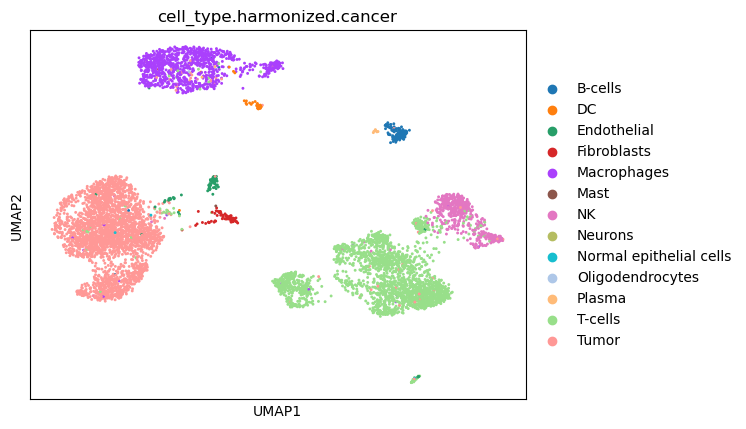

In [44]:
# Draw the umap
sc.pl.umap(
    adata1_filtered,
    color=["cell_type.harmonized.cancer"]
)

## Normalization

Moving back to adata that is not filtered for the anotation

In [16]:
# Normalizing to median total counts
sc.pp.normalize_total(adata1)
# Logarithmize the data
sc.pp.log1p(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


## Feature selection

In [17]:
adata1.shape

(7323, 36601)

In [18]:
sc.pp.highly_variable_genes(adata1, n_top_genes=2000)

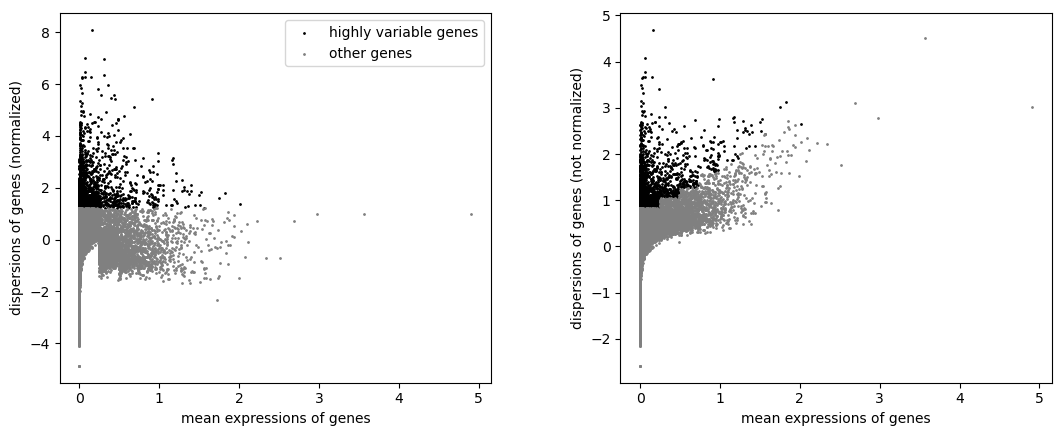

In [19]:
sc.pl.highly_variable_genes(adata1)

In [20]:
adata1 = adata1[:, adata1.var.highly_variable]
adata1

View of AnnData object with n_obs × n_vars = 7323 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

The number of genes changed form 36601 to 2000

## Dimensionality reduction

In [21]:
sc.tl.pca(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


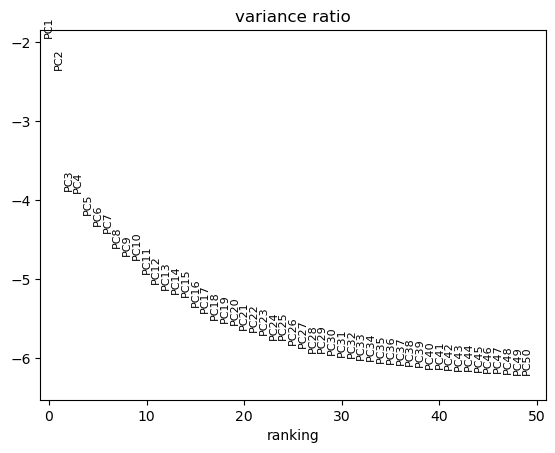

In [22]:
sc.pl.pca_variance_ratio(adata1, n_pcs=50, log=True)

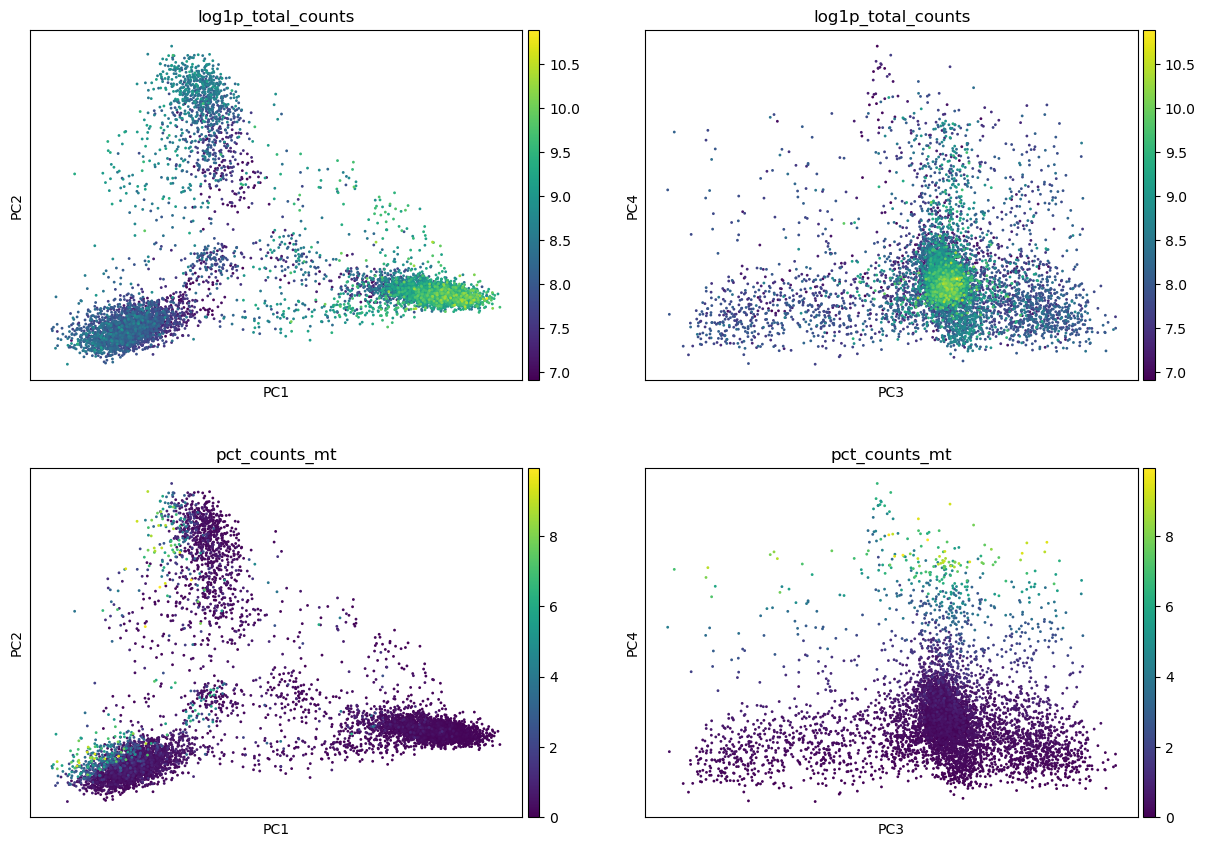

In [23]:
sc.pl.pca(
    adata1,
    color=["log1p_total_counts"] * 2 + ["pct_counts_mt"] * 2,
    dimensions=[(0, 1), (2, 3)] * 2,
    ncols=2,
    # size=2,
)

## Nearest neighbor graph constuction and visualization

In [24]:
sc.pp.neighbors(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
sc.tl.umap(adata1)

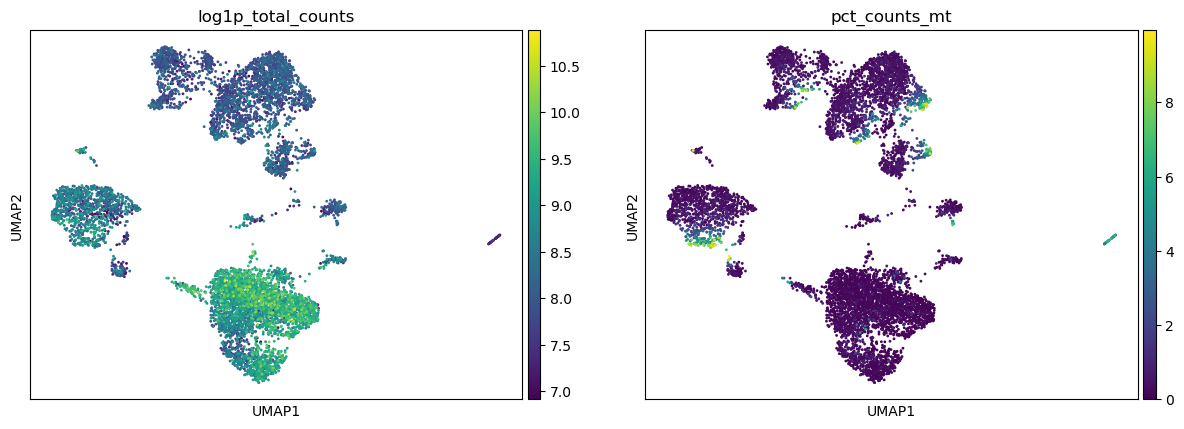

In [26]:
sc.pl.umap(
    adata1,
    color=["log1p_total_counts", "pct_counts_mt"]
)

### Clustering

In [27]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata1, n_iterations=2)

C:\Users\gajaj\AppData\Local\Temp\ipykernel_26684\2380624730.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata1, n_iterations=2)


In [46]:
sc.tl.leiden(adata1_filtered, n_iterations=2)

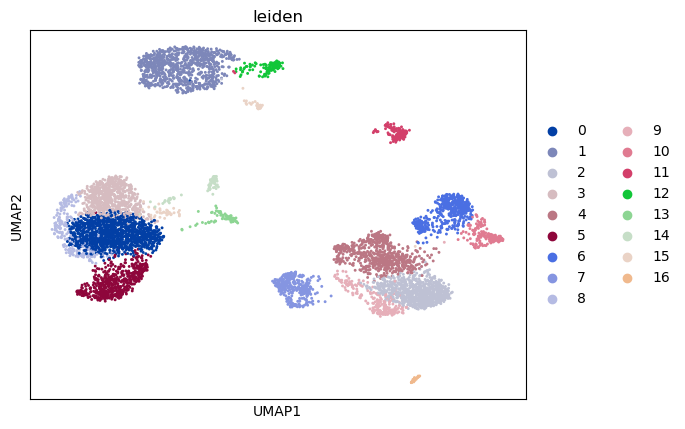

In [47]:
sc.pl.umap(adata1_filtered, color=["leiden"])

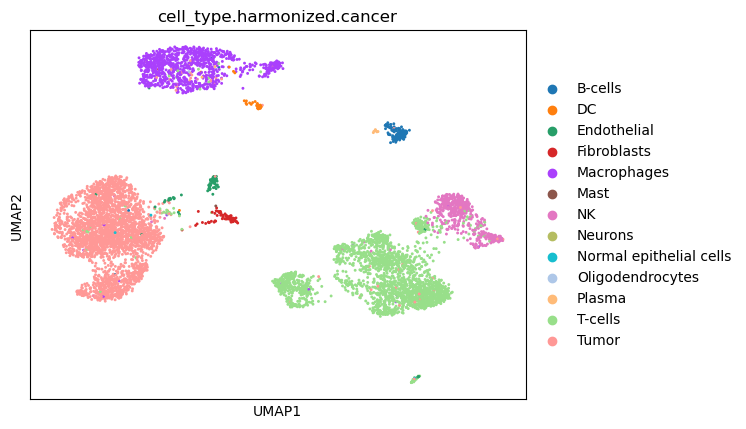

In [48]:
sc.pl.umap(adata1_filtered, color=["cell_type.harmonized.cancer"])

## Create a .tsv file

In [48]:
cell_barcodes = adata1.obs_names
gene_ids = adata1.var["gene_ids"]
expression_matrix = adata1.X

In [49]:
if not isinstance(expression_matrix, np.ndarray):
    expression_matrix = expression_matrix.toarray()  # Convert sparse to dense if neede

In [69]:
# Create a DataFrame for the long-format data
data = pd.DataFrame(
    {
        'barcode': np.repeat(cell_barcodes, len(gene_ids)),
        'gene_id': np.tile(gene_ids, len(cell_barcodes)),
        'expression_count': expression_matrix.flatten()
    }
)

# Preview the resulting DataFrame
print(data.head())

              barcode          gene_id  expression_count
0  AAACCCAAGTACTCGT-1  ENSG00000162571               0.0
1  AAACCCAAGTACTCGT-1  ENSG00000186891               0.0
2  AAACCCAAGTACTCGT-1  ENSG00000235098               0.0
3  AAACCCAAGTACTCGT-1  ENSG00000187730               0.0
4  AAACCCAAGTACTCGT-1  ENSG00000142611               0.0


In [70]:
# Remove rows where expression_count is zero
data = data[data['expression_count'] != 0]

In [71]:
data['expression_count'].max()

5.706975241038507

In [72]:
mean_expression = data['expression_count'].mean()
mean_expression

1.0115154099107684

In [73]:
# Create a new column 'classification' based on the mean
data['classification'] = data['expression_count'].apply(
    lambda x: 'high' if x > mean_expression else 'low'
)
print(data.head)

<bound method NDFrame.head of                      barcode          gene_id  expression_count classification
65        AAACCCAAGTACTCGT-1  ENSG00000184005          2.064091           high
69        AAACCCAAGTACTCGT-1  ENSG00000153898          1.191711           high
76        AAACCCAAGTACTCGT-1  ENSG00000171488          1.191711           high
82        AAACCCAAGTACTCGT-1  ENSG00000079335          2.522809           high
89        AAACCCAAGTACTCGT-1  ENSG00000134242          1.191711           high
...                      ...              ...               ...            ...
14645973  TTTGTTGGTCCTTTGC-1  ENSG00000225689          0.626064            low
14645985  TTTGTTGGTCCTTTGC-1  ENSG00000165246          0.254703            low
14645991  TTTGTTGGTCCTTTGC-1  ENSG00000198804          0.770254            low
14645995  TTTGTTGGTCCTTTGC-1  ENSG00000198938          0.457524            low
14645997  TTTGTTGGTCCTTTGC-1  ENSG00000198886          0.457524            low

[1238052 rows x 4 col

In [75]:
# Reset the index of the DataFrame and drop the old index
data = data.reset_index(drop=True)
print(data.head)

<bound method NDFrame.head of                     barcode          gene_id  expression_count classification
0        AAACCCAAGTACTCGT-1  ENSG00000184005          2.064091           high
1        AAACCCAAGTACTCGT-1  ENSG00000153898          1.191711           high
2        AAACCCAAGTACTCGT-1  ENSG00000171488          1.191711           high
3        AAACCCAAGTACTCGT-1  ENSG00000079335          2.522809           high
4        AAACCCAAGTACTCGT-1  ENSG00000134242          1.191711           high
...                     ...              ...               ...            ...
1238047  TTTGTTGGTCCTTTGC-1  ENSG00000225689          0.626064            low
1238048  TTTGTTGGTCCTTTGC-1  ENSG00000165246          0.254703            low
1238049  TTTGTTGGTCCTTTGC-1  ENSG00000198804          0.770254            low
1238050  TTTGTTGGTCCTTTGC-1  ENSG00000198938          0.457524            low
1238051  TTTGTTGGTCCTTTGC-1  ENSG00000198886          0.457524            low

[1238052 rows x 4 columns]>


In [77]:
data.to_csv('/Users/gajaj/OneDrive/Documents/TUM/computational_single_cell/Gene-expression-changes-from-CNV/preprocessing/Sample1_outs/data_filtered.tsv', sep='\t', index=False)

In [78]:
# Count the number of rows for each classification
classification_counts = data["classification"].value_counts()

print(classification_counts)


classification
low     730175
high    507877
Name: count, dtype: int64
